In [1]:
import pandas
import numpy as np

# Data Preparation

In [2]:
trainDataFile = 'ijcnlp_dailydialog/train/dialogues_train.txt'
trainLabelsFile = 'ijcnlp_dailydialog/train/dialogues_act_train.txt' 

In [3]:
testDataFile = 'ijcnlp_dailydialog/validation/dialogues_validation.txt'
testLablesFile = 'ijcnlp_dailydialog/validation/dialogues_act_validation.txt'

In [4]:
lineSeparator = '__eou__'

In [5]:
def getData(dialogueFile, labelFile):
    with open(dialogueFile) as f:
        lines = f.readlines() 
    with open(labelFile) as f:
        labels = f.readlines()    
    
    inputs = []
    for line in lines:
        line = line.rstrip()
        line = line.split(lineSeparator)
        inputs.extend(line[:-1])
    
    acts = []
    for label in labels:
        label = label.rstrip()
        label = label.split()
        acts.extend(label)
        
    return (inputs, acts)

In [6]:
with open(trainDataFile) as f:
    lines = f.readlines()

In [7]:
with open(trainLabelsFile) as f:
    labels = f.readlines()

In [8]:
len(labels)

11118

In [9]:
len(lines)

11118

In [10]:
lines[0]

"Say , Jim , how about going for a few beers after dinner ? __eou__ You know that is tempting but is really not good for our fitness . __eou__ What do you mean ? It will help us to relax . __eou__ Do you really think so ? I don't . It will just make us fat and act silly . Remember last time ? __eou__ I guess you are right.But what shall we do ? I don't feel like sitting at home . __eou__ I suggest a walk over to the gym where we can play singsong and meet some of our friends . __eou__ That's a good idea . I hear Mary and Sally often go there to play pingpong.Perhaps we can make a foursome with them . __eou__ Sounds great to me ! If they are willing , we could ask them to go dancing with us.That is excellent exercise and fun , too . __eou__ Good.Let ' s go now . __eou__ All right . __eou__\n"

In [11]:
lines[0].rstrip().split('__eou__')[:-1]

['Say , Jim , how about going for a few beers after dinner ? ',
 ' You know that is tempting but is really not good for our fitness . ',
 ' What do you mean ? It will help us to relax . ',
 " Do you really think so ? I don't . It will just make us fat and act silly . Remember last time ? ",
 " I guess you are right.But what shall we do ? I don't feel like sitting at home . ",
 ' I suggest a walk over to the gym where we can play singsong and meet some of our friends . ',
 " That's a good idea . I hear Mary and Sally often go there to play pingpong.Perhaps we can make a foursome with them . ",
 ' Sounds great to me ! If they are willing , we could ask them to go dancing with us.That is excellent exercise and fun , too . ',
 " Good.Let ' s go now . ",
 ' All right . ']

In [12]:
labels[0]

'3 4 2 2 2 3 4 1 3 4 \n'

In [13]:
lines[0].count('__eou__')

10

In [14]:
labels[0].count(' ')

10

In [15]:
inputs = []
for line in lines:
    line = line.rstrip()
    line = line.split(lineSeparator)
    inputs.extend(line[:-1])

In [16]:
inputs[-4:]

[' Take a look at the ones on display , please . ',
 ' I need size 41 . ',
 'Could I have the check , please ? ',
 " Okay . I'll just be a minute . "]

In [17]:
acts = []
for label in labels:
    label = label.rstrip()
    label = label.split()
    acts.extend(label)

In [18]:
len(inputs)

87170

In [19]:
len(acts)

87170

In [20]:
class Data: pass

In [21]:
dialogues = Data()

In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [23]:
count_vect = CountVectorizer()

In [24]:
trainX, trainY = getData(trainDataFile, trainLabelsFile)

In [25]:
trainX[0]

'Say , Jim , how about going for a few beers after dinner ? '

In [26]:
trainX = count_vect.fit_transform(trainX)

In [27]:
valX, valY = getData(testDataFile, testLablesFile)

In [28]:
valX = count_vect.transform(valX)

# Train a classifier

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
model = LogisticRegression(n_jobs=-1)

In [31]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier

In [32]:
np.random.seed(0)

In [33]:
model = RandomForestClassifier(n_estimators=100)

In [34]:
%%time
model.fit(trainX, trainY)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# Evaluation

In [35]:
from sklearn import metrics

In [36]:
preds = model.predict(valX)

In [37]:
preds

array(['2', '1', '3', ..., '2', '1', '1'], dtype='|S1')

In [38]:
probs = model.predict_proba(valX)

In [39]:
# len(probs)
valX.shape

(8069, 17635)

In [40]:
probs[1]

array([0.56 , 0.295, 0.055, 0.09 ])

In [41]:
metrics.accuracy_score(valY, model.predict(valX))

0.7325566984756475

In [42]:
metrics.accuracy_score(trainY, model.predict(trainX))

0.9690375129058162

In [43]:
print(metrics.classification_report(valY, model.predict(valX)))

             precision    recall  f1-score   support

          1       0.67      0.87      0.76      3125
          2       0.83      0.85      0.84      2244
          3       0.78      0.55      0.64      1775
          4       0.67      0.34      0.45       925

avg / total       0.74      0.73      0.72      8069



In [44]:
cmat = metrics.confusion_matrix(valY, model.predict(valX))

In [45]:
cmat.diagonal()/cmat.sum(axis=1)

array([0, 0, 0, 0])

In [46]:
cmat

array([[2723,  165,  131,  106],
       [ 250, 1903,   81,   10],
       [ 583,  179,  973,   40],
       [ 506,   49,   58,  312]])

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
import itertools

In [49]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [50]:
classes = ['inform', 'question', 'directive', 'commisive']

Confusion matrix, without normalization
[[2723  165  131  106]
 [ 250 1903   81   10]
 [ 583  179  973   40]
 [ 506   49   58  312]]


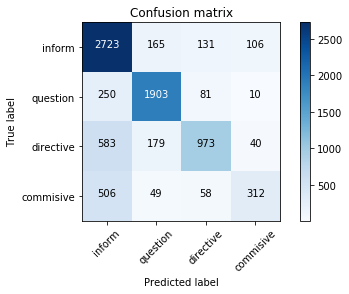

In [51]:
plot_confusion_matrix(cmat, classes)

Normalized confusion matrix
[[0.87136    0.0528     0.04192    0.03392   ]
 [0.1114082  0.84803922 0.03609626 0.00445633]
 [0.3284507  0.10084507 0.54816901 0.02253521]
 [0.54702703 0.05297297 0.0627027  0.3372973 ]]


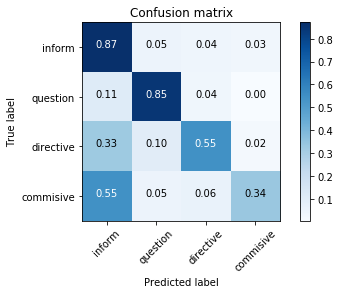

In [52]:
plot_confusion_matrix(cmat, classes, normalize=True)

In [53]:
correctPerClass = {}
totalPerClass   = {}
for cls in ['1','2','3','4']:
    correctPerClass[cls] = 0
    totalPerClass[cls]   = 0
for yt, yp in zip(valY, preds):
    totalPerClass[yt] += 1
    correctPerClass[yt] += int(yt==yp)



In [54]:
totalPerClass

{'1': 3125, '2': 2244, '3': 1775, '4': 925}

In [55]:
correctPerClass

{'1': 2723, '2': 1903, '3': 973, '4': 312}

In [56]:
for cls in ['1','2','3','4']:
    acc = float(correctPerClass[cls])/totalPerClass[cls]
    print("Accuracy for class ", cls, " :", acc)

('Accuracy for class ', '1', ' :', 0.87136)
('Accuracy for class ', '2', ' :', 0.8480392156862745)
('Accuracy for class ', '3', ' :', 0.548169014084507)
('Accuracy for class ', '4', ' :', 0.3372972972972973)


In [57]:
lineSeparator

'__eou__'

In [58]:
label

['3', '4']

In [59]:
line

['Could I have the check , please ? ', " Okay . I'll just be a minute . ", '']

In [59]:
line.split(lineSeparator)

AttributeError: 'list' object has no attribute 'split'

In [60]:
lines[-1]

"Could I have the check , please ? __eou__ Okay . I'll just be a minute . __eou__\n"

In [61]:
def run_viterbi(emission_scores, trans_scores, start_scores, end_scores):
    """Run the Viterbi algorithm.

    N - number of tokens (length of sentence)
    L - number of labels

    As an input, you are given:
    - Emission scores, as an NxL array
    - Transition scores (Yp -> Yc), as an LxL array
    - Start transition scores (S -> Y), as an Lx1 array
    - End transition scores (Y -> E), as an Lx1 array

    You have to return a tuple (s,y), where:
    - s is the score of the best sequence
    - y is the size N array/seq of integers representing the best sequence.
    """
    L = start_scores.shape[0]
    assert end_scores.shape[0] == L
    assert trans_scores.shape[0] == L
    assert trans_scores.shape[1] == L
    assert emission_scores.shape[1] == L
    N = emission_scores.shape[0]

    y = []
    T = np.zeros((N,L))
    best_Ys = np.zeros((N,L))

    for i in range(L):
        T[0][i] = emission_scores[0][i] + start_scores[i]
        if N <= 1:
                T[0][i] += end_scores[i]


    for i in range(1,N):
        for j in range(0,L):
            maxSoFar = -np.inf
            maxLabel = 0
            for k in range(L):
                if(trans_scores[k][j] + T[i-1][k] > maxSoFar):
                    maxSoFar = trans_scores[k][j] + T[i-1][k]
                    maxLabel = k
            best_Ys[i][j] = maxLabel
            T[i][j] = maxSoFar + emission_scores[i][j]
            if i == N-1:
                T[i][j] += end_scores[j]

    best_Ys = np.int_(best_Ys)
    maxY = 0
    maxScore = -np.inf
    for i in range(L):
        if T[N-1][i] > maxScore:
            maxScore = T[N-1][i]
            maxY = i
    y.append(maxY) 
    # print("best_Ys: ", best_Ys)
    # print("T: ", T)

    for i in reversed(range(N)):
        y.append(best_Ys[i, int(y[-1])])

    y = y[:-1]
    # print "y values is:", y[::-1], maxScore
    return (maxScore, y[::-1])

In [62]:
transition_matrix = [[0.37, 0.44, 0.17, 0.02], [0.77, 0.10, 0.13, 0.01], [0.06, 0.24, 0.11, 0.58], [0.35, 0.25, 0.38, 0.02]]
transition_matrix = np.log(transition_matrix)

In [63]:
valX

<8069x17635 sparse matrix of type '<type 'numpy.int64'>'
	with 78340 stored elements in Compressed Sparse Row format>

In [64]:
def data_sentence_lengths(dialogueFile, labelFile):
    with open(dialogueFile) as f:
        lines = f.readlines() 
    with open(labelFile) as f:
        labels = f.readlines()
    inputs = []        
    for line in lines:
        line = line.rstrip()
        line = line.split(lineSeparator)
        inputs.append(len(line[:-1])) 
    return inputs
        
    
def getData(dialogueFile, labelFile):
    with open(dialogueFile) as f:
        lines = f.readlines() 
    with open(labelFile) as f:
        labels = f.readlines()    
    
    inputs = []
    for line in lines:
        line = line.rstrip()
        line = line.split(lineSeparator)
        inputs.extend(line[:-1])
    
    acts = []
    for label in labels:
        label = label.rstrip()
        label = label.split()
        acts.extend(label)
        
    return (inputs, acts)

In [65]:
probs[0:3]
a = [[1,1,1],[1,1,1]]
b = [2,3,4]
a = np.asarray(a)
b = np.asarray(b)
(a.T / b.reshape(3,1)).T

array([[0, 0, 0],
       [0, 0, 0]])

In [110]:
emission_matrix = []
sentence_lengths = data_sentence_lengths(testDataFile, testLablesFile)
ind = 0
# i = sentence_lengths[0]
# emission_matrix = probs[ind:i+1]
# start_scores = [0,0,0,0]
# end_scores = [0,0,0,0]
# emission_matrix = np.asarray(emission_matrix)
# transition_matrix = np.asarray(transition_matrix)
# start_scores = np.asarray(start_scores)
# end_scores = np.asarray(end_scores)
temp = np.ones((4,4))
probs_np = np.asarray(probs)
probs_each = np.array([0.452, 0.286, 0.168, 0.094])
probs_normalised = (probs_np.T/probs_each.reshape(4,1)).T
probs_normalised = np.log(probs_normalised+0.0001)
#probs_normalised = np.log(probs_np+0.0001)
# # run_viterbi(emission_matrix, temp, start_scores, end_scores)
# run_viterbi(emission_matrix, transition_matrix, start_scores, end_scores)
results = []
print(len(sentence_lengths))
print(len(probs))
print(sum(sentence_lengths))
for i in sentence_lengths:
#     print(i)
    emission_matrix = probs_normalised[ind:ind+i]
    start_scores = [1,1,1,1]
    end_scores = [1,1,1,1]
    #start_scores = [0.27,0.49,0.23,0.01]
    #end_scores = [0.64,0.03,0.10,0.22]
    start_scores = np.log(start_scores)
    end_scores = np.log(end_scores)
    emission_matrix = np.asarray(emission_matrix)
    transition_matrix = np.asarray(transition_matrix)
#     print(emission_matrix)
    start_scores = np.asarray(start_scores)
    end_scores = np.asarray(end_scores)
    (score, seq) = run_viterbi(emission_matrix, transition_matrix, start_scores, end_scores)
#     (score, seq) = run_viterbi(emission_matrix, temp, start_scores, end_scores)
    if len(seq) != i:
        print("Mismatch", ind)
        print(seq)
    results.extend(seq)
    ind += i

1000
8069
8069


In [111]:
results
results = list(map(lambda x: str(x+1), results))
# results.map(x -> str(x+1))

In [112]:
metrics.accuracy_score(valY, results)

0.7388771842855373

In [113]:
end_scores

array([0., 0., 0., 0.])

In [114]:
valY[0:9]

['2', '1', '3', '2', '1', '2', '1', '2', '1']

In [115]:
np.zeros(3)

array([0., 0., 0.])

In [78]:
transition_matrix

array([[0.37, 0.44, 0.17, 0.02],
       [0.77, 0.1 , 0.13, 0.01],
       [0.06, 0.24, 0.11, 0.58],
       [0.35, 0.25, 0.38, 0.02]])

In [77]:
valX[0:9]

['Good morning , sir . Is there a bank near here ? ',
 ' There is one . 5 blocks away from here ? ',
 " Well , that's too far.Can you change some money for me ? ",
 ' Surely , of course . What kind of currency have you got ? ',
 ' RIB . ',
 ' How much would you like to change ? ',
 ' 1000 Yuan.Here you are . ',
 'Good afternoon . This is Michelle Li speaking , calling on behalf of IBA . Is Mr Meng available at all ? ',
 ' This is Mr Meng speaking , Michelle . ']

In [116]:
print(metrics.classification_report(valY, results))

             precision    recall  f1-score   support

          1       0.76      0.79      0.77      3125
          2       0.80      0.84      0.82      2244
          3       0.73      0.58      0.65      1775
          4       0.55      0.63      0.59       925

avg / total       0.74      0.74      0.74      8069



Confusion matrix, without normalization
[[2459  229  204  233]
 [ 153 1889  107   95]
 [ 387  213 1027  148]
 [ 227   45   66  587]]


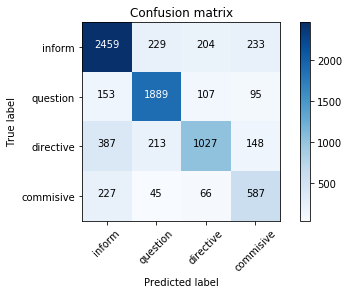

In [117]:
cmat = metrics.confusion_matrix(valY, results)
cmat.diagonal()/cmat.sum(axis=1)
plot_confusion_matrix(cmat, classes)

Normalized confusion matrix
[[0.78688    0.07328    0.06528    0.07456   ]
 [0.06818182 0.84180036 0.04768271 0.04233512]
 [0.21802817 0.12       0.57859155 0.08338028]
 [0.24540541 0.04864865 0.07135135 0.63459459]]


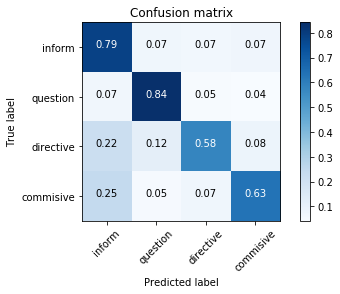

In [118]:
plot_confusion_matrix(cmat, classes, normalize=True)